In [1]:
import numpy as np
import sys
sys.path.insert(0, '/Users/jakob/Documents/Studium/Master/Michaelmas Term/L48 - ML and the Physical World/Project/Workspace/above-ground-carbon-density-estimation/src')

from data import DataLoad
from vegetation import WaterUtils
from custom_kernels import WaterRBFKernel

In [4]:
source = "COPERNICUS/Landcover/100m/Proba-V-C3/Global" # https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_Landcover_100m_Proba-V-C3_Global
center_point = np.array([[-82.8642, 42.33]]) # np.array([[45.77, 4.855]])
num_points = 101
scale = 250
veg_idx_band = 'discrete_classification'
data_load_type = 'optimal'

dataLoader = DataLoad(source = source, center_point = center_point, num_points = num_points, scale = scale, veg_idx_band = veg_idx_band, data_load_type = data_load_type)
water_utils = WaterUtils(dataLoader = dataLoader, water_value = 80)

Initialize the new instance of DataLoad.


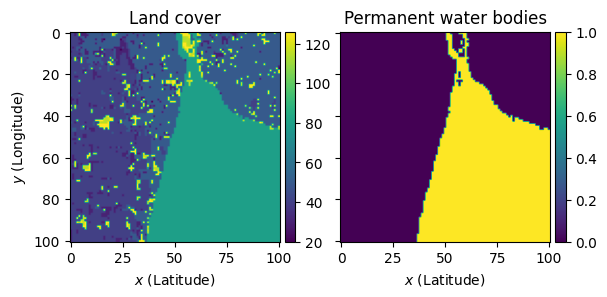

In [5]:
plot = water_utils.plot_vegetation_and_water_data()
plot.show()

In [4]:
bitmask_land_land, bitmask_land_water, bitmask_water_water, class_map = water_utils.get_bitmasks()

In [5]:
dataloader_high = DataLoad(source = 'MODIS/061/MOD13Q1', center_point = np.array([[-82.8642, 42.33]]), num_points = 101, scale = 250, veg_idx_band = 'NDVI', data_load_type = 'optimal')
high_fidelity_data = dataloader_high.load_data()
high_fidelity_data_reshaped = high_fidelity_data.reshape(10201, 1)

Initialize the new instance of DataLoad.


In [6]:
waterRBFKernel = WaterRBFKernel(input_dim = 1, variance_land = 20.0, lengthscale_land = 3.0, bitmask_land_land = bitmask_land_land, bitmask_water_water = bitmask_water_water)
K = waterRBFKernel.K(high_fidelity_data_reshaped)
Kdiag = waterRBFKernel.Kdiag(high_fidelity_data_reshaped)